In [1]:
CACHE_DIR = "/home/anton/cache"

In [2]:
import tqdm
import time
import numpy as np

def train_eval(agent, env, train_steps, eval_steps):

    done = True
    r = None
    info = None

    ts = []
    for _ in tqdm.tqdm_notebook(range(train_steps)):
        
        start = time.time()
        
        if done:
            if r:
                agent.end_episode(r, info)
            obs = env.reset()
            a = agent.begin_episode(obs)
    #         print(a)
            obs, r, done, info = env.step(a)
    #         done = False
        else:
            a = agent.step(r, obs, info)
    #         print(a)
            obs, r, done, info = env.step(a)
        
        end = time.time()
        ts.append(end-start)
    
    mean_train_t = np.mean(ts)
    
    done = True
    r = None
    info = None
    agent.eval_mode = True
    
    ts = []
    for _ in tqdm.tqdm_notebook(range(eval_steps)):
        start = time.time()
        if done:
            if r:
                agent.end_episode(r, info)
            obs = env.reset()
            a = agent.begin_episode(obs)
            obs, r, done, info = env.step(a)
        else:
            a = agent.step(r, obs, info)
            obs, r, done, info = env.step(a)
        end = time.time()
        ts.append(end-start)
    
    mean_eval_t = np.mean(ts)
    
    return mean_train_t, mean_eval_t

In [3]:
from agents import PopularityAgent, SVDAgent, LinUCB, HLinUCB, create_drr_agent, RandomAgent

from rec_gym.wrappers import StatsWrapper, DRR_EmbBaselinesWrapper, ExplicitUserItemWrapper, DRR_ExplicitUserItemWrapper

from rec_gym.envs import MovieLensDRR, MovieLens100

In [4]:
session_size = [10, 20, 30]
session_time = [20*60, 60*60]
normalized_reward = [True, False]

In [5]:
def make_env(session_size=10, seed=123):
#     env = MovieLensDRR(embedding_dimension=20, 
#              n_items_to_recommend=1, 
#              env_seed=0,
#              normalize_reward=True,
# #              filename="/home/anton/Datasets/MovieLens/ml-100k/u.data",
# #              sep='\t',
#              filename="/home/anton/Datasets/MovieLens/ml-1m/ratings.dat",\
#              sep='::',\
# #              session_time = 20 * 60,
#              session_size = session_size,
#              cache_dir=CACHE_DIR,
#              shuffle_sessions=False)
    CACHE_DIR = "/home/anton/cache"
    
    
#     env = MovieLensDRR(embedding_dimension=20, 
#              n_items_to_recommend=1, 
#              env_seed=seed,
#              normalize_reward=True,
# #              filename="/home/anton/Datasets/MovieLens/ml-100k/u.data",
# #              sep='\t',
#              filename="/home/anton/Datasets/MovieLens/ml-1m/ratings.dat",\
#              sep='::',\
# #              session_time = 20 * 60,
#              session_size = session_size,
#              cache_dir=CACHE_DIR,
#              shuffle_sessions=True)
    env = MovieLensDRR(embedding_dimension=40, 
             n_items_to_recommend=1, 
             env_seed=seed,
             normalize_reward=True,
             filename="/home/anton/Datasets/MovieLens/ml-100k/u.data",
             sep='\t',
    #              session_time = 20 * 60,
             session_size = session_size,
             cache_dir=CACHE_DIR,
             shuffle_sessions=True
                      )
#     env = MovieLens100(
#                  n_items_to_recommend=1,
#                  env_seed=seed,
#                  normalize_reward=False,
#                  session_time=None,
#                  session_size=session_size,
#                  shuffle_sessions=True,
#                  )
    
    return StatsWrapper(env)

# envs_kv = {
# #     'ml-100k_s10' : lambda : make_env(10),
# #     'ml-100k_s20' : lambda : make_env(20),
# #     'ml-100k_s30' : lambda : make_env(30),
# #       'ml-100k_s60' : lambda : make_env(60),
#     'ml-1m_s30' : lambda: make_env(30, 123)
# }


envs_kv = { 
    'ml_100k_s20_seed' : lambda x: make_env(20, x) ,
    'ml_100k_s30_seed' : lambda x: make_env(30, x) 
              }


agents_kv = {
    'Random' : lambda env : RandomAgent(env.unwrapped.n_rec),
    'Popularity' : lambda env: PopularityAgent(env.unwrapped),
    'SVD' : lambda env: SVDAgent(env.unwrapped),
    'LinUCB' : lambda env: LinUCB(env.unwrapped.embedding_dimension, alpha=0.2),
#     'HLinUCB' : lambda env: HLinUCB(env.unwrapped.embedding_dimension, alpha=0.2),
}

In [6]:
from collections import defaultdict

In [7]:
results = defaultdict(dict)
results_times = defaultdict(dict)

In [8]:
TRAIN_STEPS = 80000
EVAL_STEPS = 19000

In [9]:
for env_name, create_env in tqdm.tqdm_notebook(envs_kv.items()):
    for agent_name, create_agent_fn in tqdm.tqdm_notebook(agents_kv.items()):
        
        
        for x in [100, 200, 300, 400, 500]:
        
            env = create_env(x)
            agent = create_agent_fn(env)

            mean_train_t, mean_eval_t = train_eval(agent, env, train_steps=TRAIN_STEPS, eval_steps=EVAL_STEPS)

            ename = '{}{}'.format(env_name, x)
            
            results[ename][agent_name] = env.interactions
            results_times[ename][agent_name] = (mean_train_t, mean_eval_t)

User cache /home/anton/cache/40_s_20_100_ml-100k_u.data
shuffle sessions


/home/anton/anaconda3/envs/datascience/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: <class 'rec_gym.wrappers.stats_wrapper.StatsWrapper'> doesn't implement 'reset' method, which is required for wrappers derived directly from Wrapper. Deprecated default implementation is used.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


User cache /home/anton/cache/40_s_20_200_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_300_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_400_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_500_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_100_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_200_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_300_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_400_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_500_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_100_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_20_200_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_20_300_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_20_400_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_20_500_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_20_100_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_200_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_300_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_400_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_20_500_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_100_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_200_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_300_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_400_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_500_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_100_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_200_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_300_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_400_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_500_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_100_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_30_200_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_30_300_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_30_400_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_30_500_ml-100k_u.data
shuffle sessions


Train SVD


User cache /home/anton/cache/40_s_30_100_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_200_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_300_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_400_ml-100k_u.data
shuffle sessions


User cache /home/anton/cache/40_s_30_500_ml-100k_u.data
shuffle sessions


In [10]:
# from rec_gym.wrappers import DRR_BaselinesWrapper
# from stable_baselines import PPO2, DDPG, TRPO, SAC
# import stable_baselines
# from stable_baselines.common.vec_env import DummyVecEnv

# class CustomPolicy(stable_baselines.ddpg.policies.FeedForwardPolicy):
#     def __init__(self, *args, **kwargs):
#         super(CustomPolicy, self).__init__(*args, **kwargs,
#                                            layers=[64, 32],
#                                            feature_extraction="mlp")
        
# class LSTMCustomPolicy(stable_baselines.ddpg.policies.FeedForwardPolicy):
#     def __init__(self, *args, **kwargs):
#         super(LSTMCustomPolicy, self).__init__(*args, **kwargs,
#                                            layers=[32, 32],
#                                            feature_extraction="lstm")


# class CustomPolicy2(stable_baselines.ddpg.policies.FeedForwardPolicy):
#     def __init__(self, *args, **kwargs):
#         super(CustomPolicy2, self).__init__(*args, **kwargs,
#                                            layers=[16, 16],
#                                            feature_extraction="mlp")

        
# baseline_agents_kv = {
# #     'DDPG' : lambda env: DDPG(CustomPolicy, DRR_BaselinesWrapper(env), 
# #                                       verbose=2, batch_size=64, 
# #                                       nb_train_steps=1,
# #                                       nb_eval_steps=0,
# #                                       nb_rollout_steps=5, 
# #                                       memory_limit=10000,
# #                                       tensorboard_log='./logs/DDPG_sb', 
# #                                       full_tensorboard_log=False),
    
#     'DDPGsmall' : lambda env: DDPG(CustomPolicy2, DRR_BaselinesWrapper(env), 
#                                       verbose=2, batch_size=64, 
#                                       nb_train_steps=1,
#                                       nb_eval_steps=0,
#                                       nb_rollout_steps=10, 
#                                       memory_limit=10000,
#                                       tensorboard_log='./logs/DDPG_sb', 
#                                       full_tensorboard_log=False),
# }

In [11]:
# for env_name, create_env in tqdm.tqdm_notebook(envs_kv.items()):
#     for agent_name, create_agent_fn in tqdm.tqdm_notebook(baseline_agents_kv.items()):
#         print(agent_name)
#         env = create_env()
#         agent = create_agent_fn(env)

#         agent.learn(total_timesteps=TRAIN_STEPS, log_interval=50000)
#         agent.learn(total_timesteps=EVAL_STEPS, log_interval=50000)
# #         for _ in range(EVAL_STEPS):
# #             action = agent.predict()

#         results[env_name][agent_name] = env.interactions
# #         results_times[env_name][agent_name] = (mean_train_t, mean_eval_t)

In [12]:
# %%time
# with open('/home/anton/ml1m-offline_2.npz', 'wb') as f:
#     cloudpickle.dump(results, f)

In [13]:
def precision_at_k(recs, gt, k):
    relevant_items = set(gt[:k])
    
    rec_rel = [item in relevant_items for item in recs[:k]]
    return np.mean(rec_rel)
    
    
def precision_at_k_thresh(rewards, k, threshold=0.):
    rec_rel = [r >= threshold for r in rewards[:k]]
    return np.mean(rec_rel)

def dcg_at_k(rewards, k):
    dcg = 0
    for i, r in enumerate(rewards[:k]):
        if i == 0:
            dcg += r
        else:
            dcg += 2**r - 1 / np.log2(i+1)
    return dcg

def ndcg_at_k(rewards, k):
    maxdcg = dcg_at_k(np.sort(rewards)[::-1], k)
    if maxdcg == 0: return 0
    return dcg_at_k(rewards, k) / maxdcg

In [14]:
# dict = { 'eperiment name' : dict{ 'algorithm name' : list[Interactions] }}

# results['ml-1m_s30']['Random']

In [15]:
all_metrics = defaultdict(lambda: defaultdict(dict))
THRESH = 0.5
for THRESH in [0.5]:
    for dataset_name in results:
        for algorithm in results[dataset_name]:
            metrics = {}

            interactions = results[dataset_name][algorithm]
            session_recs_by_user = defaultdict(lambda : defaultdict(list))
            session_gt_by_user = defaultdict(lambda : defaultdict(list))
            session_rewards_by_user = defaultdict(lambda : defaultdict(list))

            prev_user = None

            for i in interactions[TRAIN_STEPS:]:
                u = i.uid 
                recs = i.recs
                gt = i.raw_info['ground_truth_items']
                rewards = i.rewards

                if prev_user is None or u != prev_user:
                    prev_user = u
                    user_session = len(session_recs_by_user[prev_user])

                session_recs_by_user[prev_user][user_session].extend(recs)
                session_gt_by_user[prev_user][user_session].extend(gt)
                session_rewards_by_user[prev_user][user_session].extend(rewards)


            for K in [5, 10, 15, 20]:

                precisions = []
                precisions_thresh = []
                ndcgs = []

                for k, v in session_recs_by_user.items():
                    for session_number in v:

                        recs = session_recs_by_user[k][session_number]
                        gt = session_gt_by_user[k][session_number]
                        rew = session_rewards_by_user[k][session_number]

                        p_at_k = precision_at_k(recs, gt, K)
                        precisions.append(p_at_k)

                        precisions_thresh.append(precision_at_k_thresh(rew, K, THRESH))

                        ndcgs.append(ndcg_at_k(np.array(rew)>=THRESH, K))


                metrics['NDCG@{}'.format(K)] = np.mean(ndcgs)
                metrics['Precision@{}'.format(K)] = np.mean(precisions_thresh)


            all_metrics[dataset_name][algorithm] = metrics
            
    metrics_by_algorithm = defaultdict(lambda: defaultdict(list))

    for dataset in all_metrics:
        print(dataset)
        for algorithm in all_metrics[dataset]:

            for k, v in all_metrics[dataset][algorithm].items():

                metrics_by_algorithm[algorithm][k].append(v)
                
        metrics_names = []
        for n in [5, 10, 15, 20]:
            metrics_names.append('Precision@{}'.format(n))
        for n in [5, 10, 15, 20]:
            metrics_names.append('NDCG@{}'.format(n))


        s = ['{:12s}'.format('')] + [ "{:12s}".format(m) for m in metrics_names]
        print('|'.join(s))

        for k in metrics_by_algorithm:
            s = ['{:12s}'.format(k)]
            for m in metrics_names:
                s.append("{:1.3f} +-{:1.3f}".format(np.mean(metrics_by_algorithm[k][m]), 
                                                     np.std(metrics_by_algorithm[k][m])))

            print('|'.join(s))


ml_100k_s20_seed100
            |Precision@5 |Precision@10|Precision@15|Precision@20|NDCG@5      |NDCG@10     |NDCG@15     |NDCG@20     
Random      |0.570 +-0.000|0.565 +-0.000|0.562 +-0.000|0.562 +-0.000|0.689 +-0.000|0.779 +-0.000|0.883 +-0.000|0.991 +-0.000
Popularity  |0.734 +-0.000|0.678 +-0.000|0.626 +-0.000|0.563 +-0.000|0.819 +-0.000|0.863 +-0.000|0.934 +-0.000|0.992 +-0.000
SVD         |0.576 +-0.000|0.569 +-0.000|0.567 +-0.000|0.562 +-0.000|0.694 +-0.000|0.782 +-0.000|0.887 +-0.000|0.991 +-0.000
LinUCB      |0.697 +-0.000|0.658 +-0.000|0.618 +-0.000|0.563 +-0.000|0.790 +-0.000|0.848 +-0.000|0.928 +-0.000|0.992 +-0.000
ml_100k_s20_seed200
            |Precision@5 |Precision@10|Precision@15|Precision@20|NDCG@5      |NDCG@10     |NDCG@15     |NDCG@20     
Random      |0.561 +-0.009|0.561 +-0.004|0.559 +-0.003|0.558 +-0.004|0.685 +-0.004|0.778 +-0.001|0.884 +-0.001|0.992 +-0.001
Popularity  |0.739 +-0.005|0.677 +-0.000|0.623 +-0.003|0.559 +-0.004|0.826 +-0.006|0.865 +-0.002|0.93

In [17]:
all_metrics

defaultdict(<function __main__.<lambda>()>,
            {'ml_100k_s20_seed100': defaultdict(dict,
                         {'Random': {'NDCG@5': 0.6888097158987394,
                           'Precision@5': 0.5698146372643016,
                           'NDCG@10': 0.7790931905284161,
                           'Precision@10': 0.5652600861373631,
                           'NDCG@15': 0.8825144817715701,
                           'Precision@15': 0.5618785044719848,
                           'NDCG@20': 0.9913329794938298,
                           'Precision@20': 0.561761135612278},
                          'Popularity': {'NDCG@5': 0.8194638540337967,
                           'Precision@5': 0.7337647810802173,
                           'NDCG@10': 0.8629297557100377,
                           'Precision@10': 0.6777241321584563,
                           'NDCG@15': 0.9338239554404391,
                           'Precision@15': 0.6259884437497093,
                           'NDCG@20

In [ ]:
metrics_by_algorithm = defaultdict(lambda: defaultdict(list))

for dataset in all_metrics:
    print(dataset)
    for algorithm in all_metrics[dataset]:

        for k, v in all_metrics[dataset][algorithm].items():
            
            metrics_by_algorithm[algorithm][k].append(v)

    metrics_names = []
    for n in [5, 10, 15, 20]:
        metrics_names.append('Precision@{}'.format(n))
    for n in [5, 10, 15, 20]:
        metrics_names.append('NDCG@{}'.format(n))


    s = ['{:12s}'.format('')] + [ "{:12s}".format(m) for m in metrics_names]
    print('|'.join(s))

    for k in metrics_by_algorithm:
        s = ['{:12s}'.format(k)]
        for m in metrics_names:
            s.append("{:1.3f} +-{:1.3f}".format(np.mean(metrics_by_algorithm[k][m]), 
                                                 np.std(metrics_by_algorithm[k][m])))

        print('|'.join(s))


In [28]:
all_metrics

defaultdict(<function __main__.<lambda>()>,
            {'ml_100k_s20_seed100': defaultdict(dict,
                         {'Random': {'NDCG@5': 0.6888097158987394,
                           'Precision@5': 0.5698146372643016,
                           'NDCG@10': 0.7790931905284161,
                           'Precision@10': 0.5652600861373631,
                           'NDCG@15': 0.8825144817715701,
                           'Precision@15': 0.5618785044719848,
                           'NDCG@20': 0.9913329794938298,
                           'Precision@20': 0.561761135612278},
                          'Popularity': {'NDCG@5': 0.8194638540337967,
                           'Precision@5': 0.7337647810802173,
                           'NDCG@10': 0.8629297557100377,
                           'Precision@10': 0.6777241321584563,
                           'NDCG@15': 0.9338239554404391,
                           'Precision@15': 0.6259884437497093,
                           'NDCG@20

In [30]:
metrics_by_algorithm = defaultdict(lambda: defaultdict(list))

for name in ['ml_100k_s20_seed', 'ml_100k_s30_seed']:
    
    for dataset in all_metrics:
        if dataset[:-3] == name:
    
            for algorithm in all_metrics[dataset]:

                for k, v in all_metrics[dataset][algorithm].items():

                    metrics_by_algorithm[algorithm][k].append(v)
    
    metrics_names = []
    for n in [5, 10, 15, 20]:
        metrics_names.append('Precision@{}'.format(n))
    for n in [5, 10, 15, 20]:
        metrics_names.append('NDCG@{}'.format(n))


    s = ['{:12s}'.format('')] + [ "{:12s}".format(m) for m in metrics_names]
    print('|'.join(s))

    for k in metrics_by_algorithm:
        s = ['{:12s}'.format(k)]
        for m in metrics_names:
            s.append("{:1.2f} +-{:1.2f}".format(np.mean(metrics_by_algorithm[k][m]), 
                                                 np.std(metrics_by_algorithm[k][m])))

        print('|'.join(s))

            |Precision@5 |Precision@10|Precision@15|Precision@20|NDCG@5      |NDCG@10     |NDCG@15     |NDCG@20     
Random      |0.56 +-0.01|0.56 +-0.00|0.56 +-0.00|0.56 +-0.00|0.68 +-0.00|0.78 +-0.00|0.88 +-0.00|0.99 +-0.00
Popularity  |0.74 +-0.00|0.68 +-0.00|0.62 +-0.00|0.56 +-0.00|0.82 +-0.00|0.86 +-0.00|0.94 +-0.00|0.99 +-0.00
SVD         |0.58 +-0.00|0.56 +-0.00|0.56 +-0.00|0.56 +-0.00|0.70 +-0.00|0.78 +-0.00|0.89 +-0.00|0.99 +-0.00
LinUCB      |0.69 +-0.01|0.65 +-0.00|0.61 +-0.00|0.56 +-0.00|0.79 +-0.01|0.85 +-0.00|0.93 +-0.00|0.99 +-0.00
            |Precision@5 |Precision@10|Precision@15|Precision@20|NDCG@5      |NDCG@10     |NDCG@15     |NDCG@20     
Random      |0.56 +-0.01|0.56 +-0.01|0.56 +-0.01|0.56 +-0.00|0.68 +-0.01|0.76 +-0.02|0.84 +-0.04|0.93 +-0.06
Popularity  |0.75 +-0.01|0.69 +-0.02|0.65 +-0.03|0.60 +-0.04|0.83 +-0.01|0.86 +-0.01|0.91 +-0.03|0.96 +-0.04
SVD         |0.57 +-0.01|0.57 +-0.00|0.56 +-0.01|0.56 +-0.00|0.69 +-0.01|0.77 +-0.01|0.84 +-0.04|0.93 +-0.06
Lin

In [16]:
import matplotlib.pylab as plt
from pandas import DataFrame
moving_average = lambda x, **kw: DataFrame(
    {'x': np.asarray(x)}).x.ewm(**kw).mean().values


def visualize(results):
    train_steps = TRAIN_STEPS
    
    for K in [10, 15]:
        fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
        fig.suptitle('@%d' % K)
        
        
        for name, interactions in results.items():
            session_recs_by_user = defaultdict(lambda : defaultdict(list))
            session_gt_by_user = defaultdict(lambda : defaultdict(list))
            session_rewards_by_user = defaultdict(lambda : defaultdict(list))

            prev_user = None

            for i in interactions[train_steps:]:
                u = i.uid 
                recs = i.recs
                gt = i.raw_info['ground_truth_items']
                rewards = i.rewards

                if prev_user is None or u != prev_user:
                    prev_user = u
                    user_session = len(session_recs_by_user[prev_user])

                session_recs_by_user[prev_user][user_session].extend(recs)
                session_gt_by_user[prev_user][user_session].extend(gt)
                session_rewards_by_user[prev_user][user_session].extend(rewards)

            precisions = []
            precisions_thresh = []
            ndcgs = []

            for k, v in session_recs_by_user.items():
                for session_number in v:

                    recs = session_recs_by_user[k][session_number]
                    gt = session_gt_by_user[k][session_number]
                    rew = session_rewards_by_user[k][session_number]

                    p_at_k = precision_at_k(recs, gt, K)
                    precisions.append(p_at_k)

                    precisions_thresh.append(precision_at_k_thresh(rew, K, 0.5))

                    ndcgs.append(ndcg_at_k(np.array(rew)>=0.5, K))
            #         ndcgs.append(ndcg_at_k(np.clip(rew, 0, 1), K))
            
                    

            span = 40
            ax[0].plot(moving_average(ndcgs, span=span), 
                       label="%s : NDCG@%d = %.4f" % (name, K, np.mean(ndcgs)))
            ax[0].legend()

            ax[1].plot(moving_average(precisions, span=span), 
                       label="%s : Precision = %.4f" % (name, np.mean(precisions)) )
            ax[1].legend()

            ax[2].plot(moving_average(precisions_thresh, span=span), 
                       label='%s : Precision@%d = %.4f' % (name, K, np.mean(precisions_thresh)) )
            ax[2].legend()
    
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
        fig.suptitle('Coverage')
        xs = []
        coverages = []
        for name, interactions in results.items():
            # train
            train_items = set()

            session_recs_by_user = defaultdict(lambda : defaultdict(list))
            session_gt_by_user = defaultdict(lambda : defaultdict(list))
            session_rewards_by_user = defaultdict(lambda : defaultdict(list))

            prev_user = None

            for i in interactions[:train_steps]:
                u = i.uid 
                recs = i.recs
                gt = i.raw_info['ground_truth_items']
                rewards = i.rewards

                if prev_user is None or u != prev_user:
                    prev_user = u
                    user_session = len(session_recs_by_user[prev_user])

                session_recs_by_user[prev_user][user_session].extend(recs)
                session_gt_by_user[prev_user][user_session].extend(gt)
                session_rewards_by_user[prev_user][user_session].extend(rewards)

            for k, v in session_recs_by_user.items():
                for session_number in v:

                    recs = session_recs_by_user[k][session_number]

                    for item in recs:
                        train_items.add(item)

            # test
            test_items = set()

            session_recs_by_user = defaultdict(lambda : defaultdict(list))
            session_gt_by_user = defaultdict(lambda : defaultdict(list))
            session_rewards_by_user = defaultdict(lambda : defaultdict(list))

            prev_user = None

            for i in interactions[:train_steps]:
                u = i.uid 
                recs = i.recs
                gt = i.raw_info['ground_truth_items']
                rewards = i.rewards

                if prev_user is None or u != prev_user:
                    prev_user = u
                    user_session = len(session_recs_by_user[prev_user])

                session_recs_by_user[prev_user][user_session].extend(recs)
                session_gt_by_user[prev_user][user_session].extend(gt)
                session_rewards_by_user[prev_user][user_session].extend(rewards)

            for k, v in session_recs_by_user.items():
                for session_number in v:

                    recs = session_recs_by_user[k][session_number][:K]

                    for item in recs:
                        test_items.add(item)


            coverage = len(test_items & train_items) / len(train_items)

            xs.append(name)
            coverages.append(coverage)

        ax.bar(xs, coverages)

import recmetrics
def personalization(results):
    train_steps = TRAIN_STEPS
    K = 10
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    fig.suptitle('Personalization')
    xs = []
    personalizations = []
    sessioned_recs_at_k = []
    for name, interactions in results.items():
        # test
        test_items = set()

        session_recs_by_user = defaultdict(lambda : defaultdict(list))
        session_gt_by_user = defaultdict(lambda : defaultdict(list))
        session_rewards_by_user = defaultdict(lambda : defaultdict(list))

        prev_user = None

        for i in interactions[:train_steps]:
            u = i.uid 
            recs = i.recs
            gt = i.raw_info['ground_truth_items']
            rewards = i.rewards

            if prev_user is None or u != prev_user:
                prev_user = u
                user_session = len(session_recs_by_user[prev_user])

            session_recs_by_user[prev_user][user_session].extend(recs)
            session_gt_by_user[prev_user][user_session].extend(gt)
            session_rewards_by_user[prev_user][user_session].extend(rewards)

        for k, v in session_recs_by_user.items():
            recs = session_recs_by_user[k][0][:K]
            sessioned_recs_at_k.append(recs)



        personalization = recmetrics.personalization(sessioned_recs_at_k)

        xs.append(name)
        personalizations.append(personalization)

        ax.bar(xs, personalizations)

In [35]:
results

defaultdict(dict,
            {'ml_100k_s30_seed': {'Random': [Interaction(t=1, uid=161, recs=[443], rewards=[0.0], probs=None, best_ps=None, ranks=None, raw_info={'rewards': [0.0], 'recs': [443], 'ground_truth_items': [246], 'ground_truth_rewards': array([3]), 'norm_truth_rewards': [0.0], 'uid': 161}),
               Interaction(t=2, uid=161, recs=[762], rewards=[0.0], probs=None, best_ps=None, ranks=None, raw_info={'rewards': [0.0], 'recs': [762], 'ground_truth_items': [340], 'ground_truth_rewards': array([3]), 'norm_truth_rewards': [0.0], 'uid': 161}),
               Interaction(t=3, uid=161, recs=[381], rewards=[-0.5], probs=None, best_ps=None, ranks=None, raw_info={'rewards': [-0.5], 'recs': [381], 'ground_truth_items': [151], 'ground_truth_rewards': array([2]), 'norm_truth_rewards': [-0.5], 'uid': 161}),
               Interaction(t=4, uid=161, recs=[904], rewards=[-1.0], probs=None, best_ps=None, ranks=None, raw_info={'rewards': [-1.0], 'recs': [904], 'ground_truth_items': [647]

In [44]:
results.key()

AttributeError: 'collections.defaultdict' object has no attribute 'key'

In [18]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
sns.set(font_scale=1.5) 


In [34]:
counts = defaultdict(lambda: defaultdict(int))

for name, interactions in results['ml_100k_s20_seed100'].items():
    session_recs_by_user = defaultdict(lambda : defaultdict(list))
    session_gt_by_user = defaultdict(lambda : defaultdict(list))
    session_rewards_by_user = defaultdict(lambda : defaultdict(list))

    prev_user = None

    for i in interactions[TRAIN_STEPS:]:
        u = i.uid 
        recs = i.recs
        gt = i.raw_info['ground_truth_items']
        rewards = i.rewards

        if prev_user is None or u != prev_user:
            prev_user = u
            user_session = len(session_recs_by_user[prev_user])

        session_recs_by_user[prev_user][user_session].extend(recs)
        session_gt_by_user[prev_user][user_session].extend(gt)
        session_rewards_by_user[prev_user][user_session].extend(rewards)

    precisions = []
    precisions_thresh = []
    ndcgs = []

    for k, v in session_recs_by_user.items():
        for session_number in v:

            recs = session_recs_by_user[k][session_number][:15]

            for item in recs:
                counts[name][item] += 1

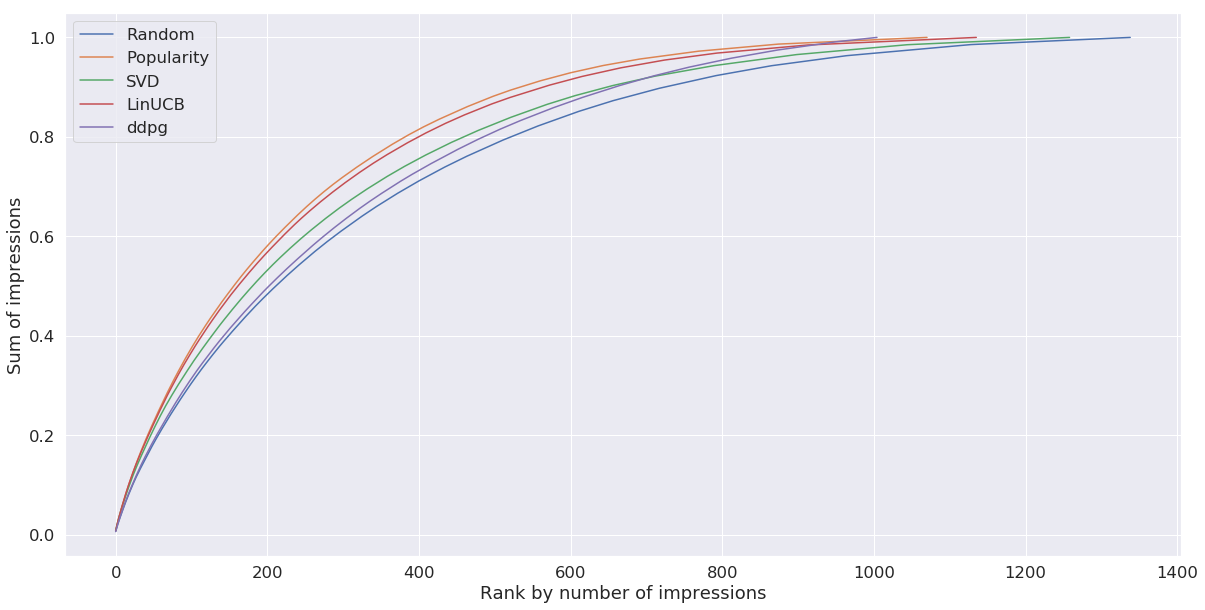

In [48]:
fig = plt.figure(figsize=(20, 10))
for name, c in counts.items():
    plt.plot(np.cumsum(np.sort(list(c.values()))[::-1])/np.sum(list(c.values())), label=name)
    

for name, c in counts2.items():
    plt.plot(np.cumsum(np.sort(list(c.values()))[::-1][:-400])/np.sum(np.sort(list(c.values()))[::-1][:-400]), label='ddpg')

plt.xlabel('Rank by number of impressions')
plt.ylabel('Sum of impressions')
plt.legend()
plt.show();

fig.savefig('100k_count.eps', format='eps')


In [38]:
np.sort(list(c.values()))[::-1][:-100]

array([122,  99,  97, ...,   1,   1,   1])

In [31]:
import cloudpickle

with open('./ddpg_100k_counts_s20', 'rb') as f:
    counts2 = cloudpickle.load(f)

ml-1m_s30


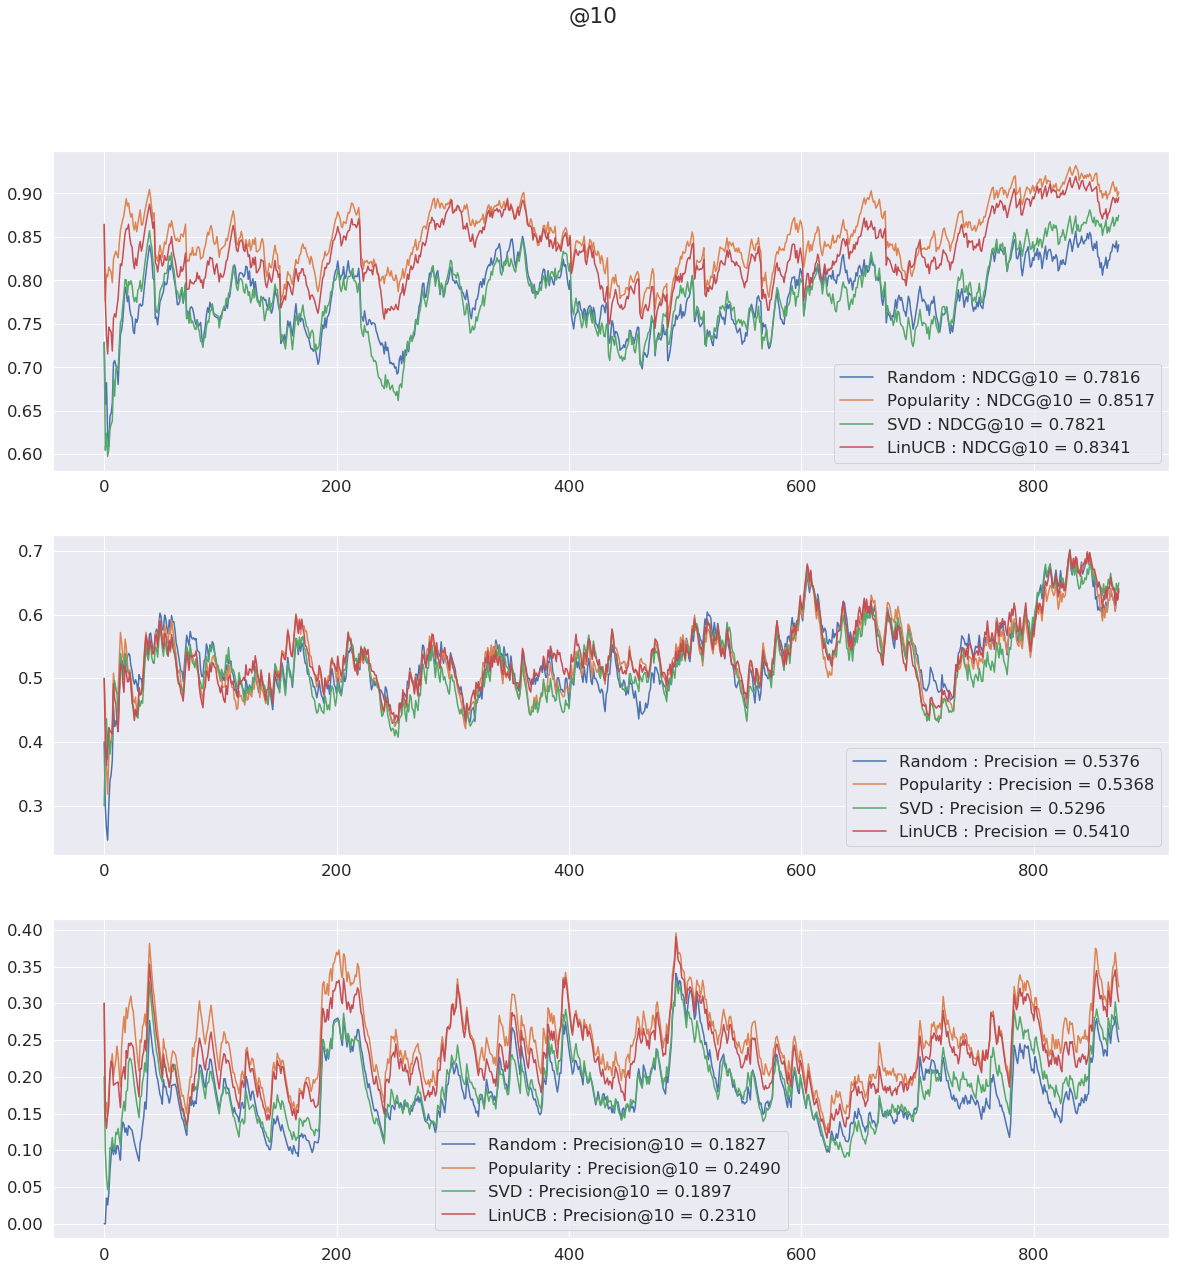

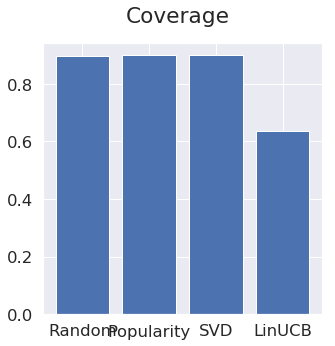

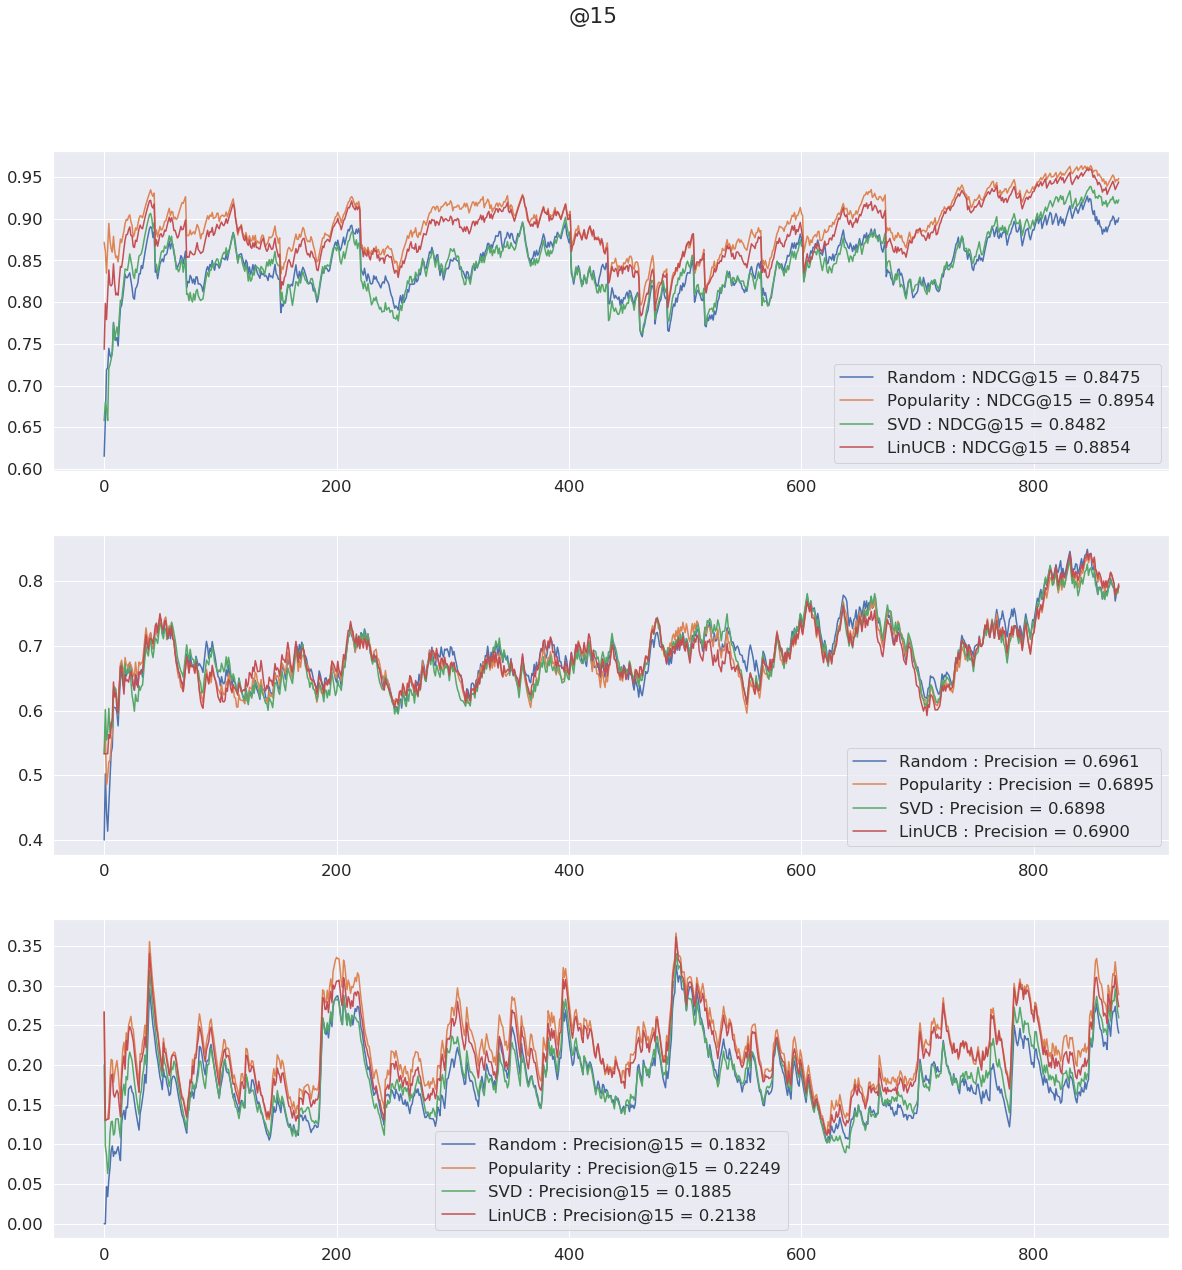

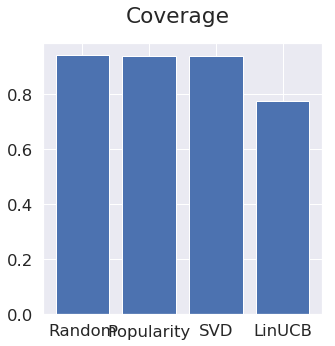

In [18]:
for env_name, res in results.items():
    print(env_name)
    visualize(res);
    plt.show();

In [24]:
%%time
import cloudpickle
with open("test.npz", "wb") as f:
    cloudpickle.dump(results, f)

CPU times: user 45.5 s, sys: 667 ms, total: 46.2 s
Wall time: 46.2 s
